## 检测动作，通过多普勒频移谱构建CNN检测

In [4]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

with open('data.data','rb') as f:
    data = pickle.load(f)
    x = data['image']
    y = data['label']

index=np.arange(len(y))
np.random.shuffle(index)

x=x[index]
y=y[index]
class_count=len(set(y))
print(class_count)

6


In [9]:
import tensorflow as tf

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.random.randint(0,30))
X = np.arange(1, len(y_test) + 1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=[3, 3],padding='same',activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2,2],strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=84, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=class_count,activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.sparse_categorical_crossentropy)

model.fit(x_train,y_train,epochs=30)

Train on 264 samples
Epoch 1/30
264/264 [==============================] - 9s 35ms/sample - loss: 787.5095
Epoch 2/30
264/264 [==============================] - 9s 33ms/sample - loss: 6.9803
Epoch 3/30
264/264 [==============================] - 9s 33ms/sample - loss: 1.5942
Epoch 4/30
264/264 [==============================] - 9s 33ms/sample - loss: 1.2817
Epoch 5/30
264/264 [==============================] - 9s 34ms/sample - loss: 1.0202
Epoch 6/30
264/264 [==============================] - 9s 32ms/sample - loss: 0.9036
Epoch 7/30
264/264 [==============================] - 9s 33ms/sample - loss: 0.8162
Epoch 8/30
264/264 [==============================] - 9s 34ms/sample - loss: 0.5425
Epoch 9/30
264/264 [==============================] - 9s 33ms/sample - loss: 0.4963
Epoch 10/30
264/264 [==============================] - 9s 32ms/sample - loss: 0.4550
Epoch 11/30
264/264 [==============================] - 9s 33ms/sample - loss: 0.2956
Epoch 12/30
264/264 [==============================

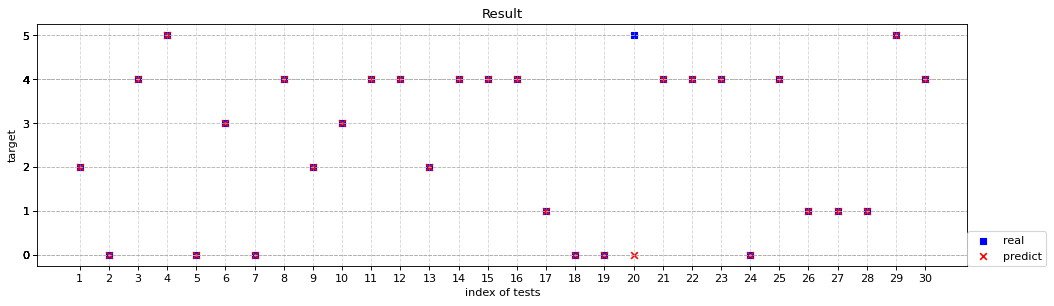

In [10]:
import matplotlib.pyplot as plt

y_pre=model.predict(x_test)
y_pre=y_pre.argmax(axis=1)
y_pre=y_pre.reshape(1,-1)

plt.figure(figsize=(15, 4), dpi=80)
plt.scatter(X, y_test, label='real', marker='s', color='blue')
plt.scatter(X, y_pre, label='predict', marker='x', color='red')
plt.legend(loc=[1, 0])
plt.grid(True, linestyle='--', alpha=0.5)
plt.yticks(y_test[::1])
plt.xticks(X[::1])
plt.xlabel('index of tests')
plt.ylabel('target')
plt.title('Result')
plt.savefig('pic\\Action_Detection_Result.jpg')